In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

# Clean The Data

In [ ]:
#Check for missing numbers

missing_values = df[df.isnull().any(axis=1)]
missing_values.head()

In [ ]:
max(missing_values.isna().sum())

##### There are no missing values, and the data set appears to be super clean, with dummies already included.

In [ ]:
#Reverse-clean for visualization purposes
df_rev = df.copy()
df_rev.columns = df_rev.columns.str.replace(' ','')

In [ ]:
df_rev.columns

In [ ]:
df_rev['Channel'] = 'Other'

In [ ]:
col_channel = {'data_channel_is_lifestyle':'Lifestyle','data_channel_is_entertainment':'Entertainment',
               'data_channel_is_bus':'Business',
               'data_channel_is_socmed':'Social_Media', 'data_channel_is_tech':"Tech",
               'data_channel_is_world':'World'}

for i in col_channel.keys():
    df_rev['Channel'] = np.where(df_rev[i]==1.0, col_channel[i],df_rev['Channel'])


In [ ]:
df_rev[df_rev['Channel']=='0']['url']
df_rev['Channel'].value_counts()

In [ ]:
day_channel = {'weekday_is_monday':'Monday', 'weekday_is_tuesday':'Tuesday',
       'weekday_is_wednesday':'Wednesday', 'weekday_is_thursday':'Thursday', 'weekday_is_friday':'Friday',
       'weekday_is_saturday':'Saturday', 'weekday_is_sunday':'Sunday'}

df_rev['Day_of_Week'] = None

for i in day_channel.keys():
    df_rev['Day_of_Week'] = np.where(df_rev[i]==1, day_channel[i],df_rev['Day_of_Week'])

In [ ]:
cols_drop = ['weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday','data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

df_rev.drop(columns=cols_drop, inplace=True)

In [ ]:
df_rev.shape



# Visualize

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.title('Correlation matrix',fontsize=24)

plt.show()

In [ ]:
df_rev.shape

In [ ]:
df_rev['Channel'].isna().sum()

In [ ]:
df_agg_C = df_rev.groupby(['Channel'])['shares'].agg(['mean','sum',np.size]).reset_index()

In [ ]:
df_agg_C.set_index('Channel',inplace=True)

In [ ]:
df_agg_C.sort_values(by='mean',inplace=True, ascending=False)
df_agg_C

In [ ]:
sns.set()

In [ ]:
cross = pd.crosstab(df_rev.Channel,df_rev.Day_of_Week)


In [ ]:
cross.sum()

In [ ]:
colors1 = sns.color_palette("GnBu_d", len(df_agg_C.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg_C.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))
df_agg_C = df_agg_C[df_agg_C.index != 'Other']

ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg_C.index, x = df_agg_C['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Shares per Article', fontsize=16)
ax1.set_ylabel(ylabel="Channel", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article, by Channel", fontsize=22)

ax2.set_xlabel(xlabel='Number of Articles', fontsize=16)
ax2.set_ylabel(ylabel="Channel", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=22)


plt.show()

In [ ]:
df_agg2 = df_rev.groupby(['Day_of_Week'])['shares'].agg(['mean','sum',np.size])
df_agg2 = df_agg2.sort_values('mean',ascending=False)

In [ ]:
df_agg2

In [ ]:
sns.set()

In [ ]:
colors1 = sns.color_palette("Blues_d", len(df_agg2.index))
colors2 = sns.color_palette("BuGn_d", len(df_agg2.index))

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,5))

plt.figure(figsize=(16,8))

ax = sns.barplot(y = df_agg2.index, x = df_agg2['mean'], orient='h', palette = colors1, ax=ax1)
ax = sns.barplot(y = df_agg2.index, x = df_agg2['size'], orient='h', palette = colors2, ax=ax2)

ax1.set_xlabel(xlabel='Average Number of Sharesper Article, by Day of Week Released', fontsize=16)
ax1.set_ylabel(ylabel="Day", fontsize=16)
ax1.set_title(label="Average Number of Shares on Social per Article", fontsize=24)

ax2.set_xlabel(xlabel='Number of Articles by Day Released', fontsize=16)
ax2.set_ylabel(ylabel="Day", fontsize=16)
ax2.set_title(label="Count of Articles", fontsize=24)


plt.show()

In [ ]:
cross = cross[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(16,8))
sns.heatmap(cross,cmap="viridis", annot=True, fmt="d")
plt.title('Total Number of Articles',fontsize=24)

plt.show()

In [ ]:
df_rev1 = df_rev[df_rev['Channel']!='Other']

ch = ['Entertainment','Business','Tech','Lifestyle','World','Social_Media']


medians = df_rev1.groupby(['Channel'])['shares'].median()
medians = medians[ch].values

median_labels = [str(np.round(s, 2)) for s in medians]


means = df_rev1.groupby(['Channel'])['shares'].mean()
means = means[ch].values
mean_labels = [str(np.round(s, 2)) for s in means]

plt.figure(figsize=(18,9))

ax = sns.boxplot(x=df_rev1['Channel'], y=df_rev1['shares'],data=df_rev1, hue='is_weekend', palette='RdPu', 
                 showfliers=False, showmeans=True, linewidth=3.)
ax.set_ylabel(ylabel='# Shares on Social', fontsize=20)
ax.set_title(label='Article Shares by Channel', fontsize=20)

leg = ax.get_legend()

new_title = 'Weekend?'
leg.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
    
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick], f'med={median_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='c', weight='semibold',fontsize=20)
    ax.text(pos[tick], means[tick], f'mean={mean_labels[tick]}', 
            horizontalalignment='center', size='x-small', color='g', weight='bold',fontsize=20)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(y='shares',x='n_tokens_content',data=df_rev, hue='is_weekend') #Hue
ax.set_xlabel(xlabel='Article Word Count', fontsize=16)
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Length of Article', fontsize=20)
ax.set_ylim(0,120000)


plt.show()

In [ ]:
df_rev.columns

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(y='shares',x='global_subjectivity',data=df_rev, hue='Channel') #Hue
ax.set_xlabel(xlabel='Global Subjectivity Score', fontsize=16)
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_title(label='Shares by Subjectivity', fontsize=20)
ax.set_ylim(0,150000)

plt.show()

In [ ]:
plt.figure(figsize=(8,6))



ax = sns.scatterplot(x='global_sentiment_polarity',y='shares',data=df_rev, hue='Channel') #Hue
ax.set_ylabel(ylabel='Number of Shares', fontsize=16)
ax.set_xlabel(xlabel='Global Sentiment Polarity', fontsize=16)
ax.set_title(label='Shares by Global Sentiment', fontsize=20)
ax.set_ylim(0,150000)

plt.show()

In [ ]:
df_rev['num_imgs'].describe()

# Remove Outliers

In [ ]:
#def iqr_fun():
    
for i in ['shares']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ = Q75+1.5*IQR
    sMinQ = max(Q25-1.5*IQR,0.0)
    print(sMinQ, sMaxQ)

In [ ]:
#df_revO = df_rev[(df_rev['shares']<MaxQ) & (df_rev['shares']>MinQ)  ]

In [ ]:
df_rev.shape

In [ ]:
df_rev['shares'].describe()

In [ ]:
plt.figure(figsize=(8,6))

df1 = df_rev[(df_rev['shares']<sMaxQ) & (df_rev['shares']>sMinQ)  ]

ax= df1['shares'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Shares', fontsize=20)
ax.set_title(label='Shares by Number of Articles', fontsize=20)

plt.show()

#### Number of Words in Article

In [ ]:
#def iqr_fun():
    
for i in ['n_tokens_content']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+1.5*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

In [ ]:
df_revO = df_rev[(df_rev['n_tokens_content']<MaxQ) & (df_rev['n_tokens_content']>MinQ)  ]

In [ ]:
df_rev.shape

In [ ]:
plt.figure(figsize=(16,8))


ax= df_revO['n_tokens_content'].hist(bins=54)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Words', fontsize=20)

plt.show()

In [ ]:
for i in ['num_videos']:
    Q25 = df_rev[i].quantile(0.25)
    Q75 = df_rev[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = Q75+2*IQR
    MinQ = max(Q25-1.5*IQR,0.0)
    print(MinQ, MaxQ)

In [ ]:
df_revO = df_revO[(df_revO['num_videos']<=MaxQ) & (df_revO['num_videos']>=MinQ)  ]

In [ ]:
df_revO.shape

In [ ]:
plt.figure(figsize=(16,8))

ax= df_revO['num_videos'].hist(bins=4)
   
ax.set_ylabel('Articles', fontsize=20)
ax.set_xlabel('Number of Videos', fontsize=20)

plt.show()

# Develop Model for Analysis

In [3]:
df.columns = df.columns.str.replace(' ','')

In [4]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [44]:
dff = df.copy()

def iqr_fun(i,dff):
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    MaxQ = round(Q75+1.5*IQR,0)+1
    MinQ = round((Q25-1.5*IQR),0)-1
    print(MinQ, MaxQ)
    return [MinQ, MaxQ]

In [45]:
dff.shape

(39644, 61)

In [46]:
dff.drop(['url','timedelta'],axis=1,inplace=True)

In [47]:
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    vif_array = np.array([])
    tolerance_array = np.array([])
    
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared = smf.ols(formula, data=data).fit().rsquared   #rsquared is the fitting of the model.
        
        vif = 1/(1-r_squared)
        vif_array = np.append(vif_array,vif).round(2)
        
        tolerance = 1-r_squared
        tolerance_array = np.append(tolerance_array,tolerance).round(2)
    
    df_vif = pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [48]:
get_vif(exogs=dff.columns,data=dff)

C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


,VIF,Tolerance
n_tokens_title,1.100000e+00,0.91
n_tokens_content,3.320000e+00,0.30
n_unique_tokens,1.367823e+04,0.00
n_non_stop_words,2.866077e+05,0.00
n_non_stop_unique_tokens,8.483750e+03,0.00
num_hrefs,1.730000e+00,0.58
num_self_hrefs,1.410000e+00,0.71
num_imgs,1.650000e+00,0.60
num_videos,1.250000e+00,0.80
average_token_length,1.261000e+01,0.08


In [49]:
df_v = dff.copy()

In [50]:
df_v.drop(['is_weekend'],axis=1,inplace=True)
df_v.drop(['weekday_is_monday'],axis=1,inplace=True)
df_v.drop(['LDA_04'],axis=1,inplace=True)
df_v.drop(['n_unique_tokens'],axis=1,inplace=True)
df_v.drop(['n_non_stop_unique_tokens'],axis=1,inplace=True)
df_v.drop(['self_reference_avg_sharess'],axis=1,inplace=True)
df_v.drop(['rate_positive_words'],axis=1,inplace=True)
df_v.drop(['kw_max_min'],axis=1,inplace=True)

In [51]:
get_vif(exogs=df_v.columns,data=df_v)

,VIF,Tolerance
n_tokens_title,1.09,0.92
n_tokens_content,2.19,0.46
n_non_stop_words,1.00,1.00
num_hrefs,1.64,0.61
num_self_hrefs,1.37,0.73
num_imgs,1.43,0.70
num_videos,1.24,0.81
average_token_length,2.95,0.34
num_keywords,1.49,0.67
data_channel_is_lifestyle,2.32,0.43


In [52]:
df_v.shape

(39644, 51)

In [53]:
columns_out_v = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', "kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares"]

for n in columns_out_v:
    print(n)
    
    q = iqr_fun(n,df_v)
    print(q)
    
    df_v = df_v[(df_v[n]<=q[1]) & (df_v[n]>=q[0])  ]

n_tokens_title
3.0 17.0
[3.0, 17.0]
n_tokens_content
-460.0 1422.0
[-460.0, 1422.0]
num_hrefs
-11.0 27.0
[-11.0, 27.0]
num_self_hrefs
-5.0 9.0
[-5.0, 9.0]
num_imgs
-1.0 5.0
[-1.0, 5.0]
num_videos
-3.0 3.0
[-3.0, 3.0]
num_keywords
1.0 15.0
[1.0, 15.0]
kw_min_min
-9.0 13.0
[-9.0, 13.0]
kw_avg_min
-158.0 602.0
[-158.0, 602.0]
kw_min_max
-11851.0 19751.0
[-11851.0, 19751.0]
kw_max_max
843299.0 843301.0
[843299.0, 843301.0]
kw_avg_max
8396.0 520626.0
[8396.0, 520626.0]
kw_min_avg
-2359.0 3930.0
[-2359.0, 3930.0]
kw_max_avg
862.0 7984.0
[862.0, 7984.0]
kw_avg_avg
1089.0 4240.0
[1089.0, 4240.0]
self_reference_min_shares
-2066.0 5240.0
[-2066.0, 5240.0]
self_reference_max_shares
-4340.0 9484.0
[-4340.0, 9484.0]


In [54]:
df_v.shape

(11519, 51)

In [55]:
columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,dff)
    print(q)
    
    dff = dff[(dff[n]<=q[1]) & (dff[n]>=q[0])  ]
    
    #print(dff.shape)

n_tokens_title
3.0 17.0
[3.0, 17.0]
n_tokens_content
-460.0 1422.0
[-460.0, 1422.0]
num_hrefs
-11.0 27.0
[-11.0, 27.0]
num_self_hrefs
-5.0 9.0
[-5.0, 9.0]
num_imgs
-1.0 5.0
[-1.0, 5.0]
num_videos
-3.0 3.0
[-3.0, 3.0]
num_keywords
1.0 15.0
[1.0, 15.0]
kw_min_min
-9.0 13.0
[-9.0, 13.0]
kw_max_min
-419.0 1851.0
[-419.0, 1851.0]
kw_avg_min
-127.0 533.0
[-127.0, 533.0]
kw_min_max
-12601.0 21001.0
[-12601.0, 21001.0]
kw_max_max
843299.0 843301.0
[843299.0, 843301.0]
kw_avg_max
9624.0 521906.0
[9624.0, 521906.0]
kw_min_avg
-2367.0 3944.0
[-2367.0, 3944.0]
kw_max_avg
887.0 7933.0
[887.0, 7933.0]
kw_avg_avg
1092.0 4223.0
[1092.0, 4223.0]
self_reference_min_shares
-1896.0 4978.0
[-1896.0, 4978.0]
self_reference_max_shares
-4169.0 9221.0
[-4169.0, 9221.0]
self_reference_avg_sharess
-1876.0 4966.0
[-1876.0, 4966.0]


In [56]:
df_v.shape

(11519, 51)

In [57]:
dff.shape

(10793, 59)

# Categorize Shares into Bins. Start with 2.

### Reduced df_v

In [59]:
for i in ['shares']:
    Q25 = df_v[i].quantile(0.25)
    Q75 = df_v[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ = Q75+1.5*IQR
    sMinQ = max(Q25-1.5*IQR,0.0)
    print(sMinQ, sMaxQ)

0.0 3477.25


In [63]:
round(sMaxQ,-2)

3500.0

In [65]:
df_v = df_v[df_v.shares<=(round(sMaxQ,-2))]

In [66]:
df_v.shares.describe()

count    10223.000000
mean      1279.780202
std        668.623119
min          5.000000
25%        815.500000
50%       1100.000000
75%       1600.000000
max       3500.000000
Name: shares, dtype: float64

In [68]:
df_v.reset_index(drop=True, inplace=True)

In [69]:
ser, bins = pd.qcut(df_v["shares"], 2, retbins=True, labels=['poor','good'])
df_v['share_cat'] = pd.cut(df_v["shares"], bins=bins, labels=[0,1], include_lowest=True)

C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
df_v.drop(['shares'],axis=1,inplace=True)

C:\Users\Tom N\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
from sklearn.model_selection import train_test_split

X_tr1, X_t1, y_tr1,y_t1 = train_test_split(df_v.drop('share_cat',axis=1), df_v['share_cat'], test_size=0.2)

In [73]:
from sklearn.linear_model import LogisticRegression

log_model1 = LogisticRegression()

log_model1.fit(X_tr1,y_tr1)

y_p_tr1= log_model1.predict(X_tr1)
y_p_t1= log_model1.predict(X_t1)

C:\Users\Tom N\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
from sklearn.metrics import accuracy_score
acc_score_tr1 = accuracy_score(y_tr1, y_p_tr1)
acc_score_t1 = accuracy_score(y_t1, y_p_t1)

print("Acc Score on traning set: {}".format(acc_score_tr1))
print("Acc Score on testing set: {}".format(acc_score_t1)) 
print("")

from sklearn.metrics import balanced_accuracy_score

bacc_score_tr1 = balanced_accuracy_score(y_tr1, y_p_tr1)
bacc_score_t1 = balanced_accuracy_score(y_t1, y_p_t1)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr1))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t1)) 

Acc Score on traning set: 0.6046710687209587
Acc Score on testing set: 0.6073349633251833

Balanced Acc Score on traning set: 0.5896996070504177
Balanced Acc Score on testing set: 0.5885130902440396


In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_t1, y_p_t1)

array([[856, 286],
       [517, 386]], dtype=int64)

In [77]:
sns.set()

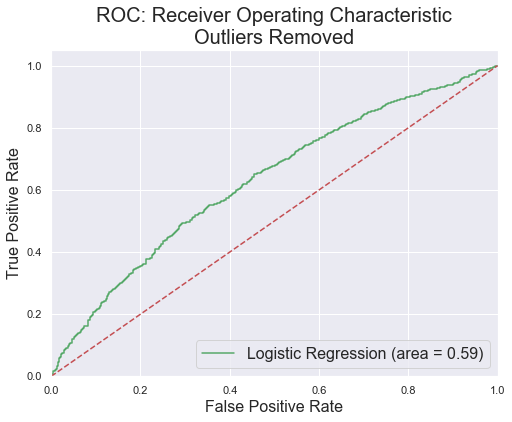

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t1, y_p_t1)
fpr, tpr, thresholds = roc_curve(y_t1, log_model1.predict_proba(X_t1)[::,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('ROC: Receiver Operating Characteristic\nOutliers Removed',fontsize=20)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

### Model is bad. Try first doing some feature selection.

In [79]:
dff.shape

(10793, 59)

In [80]:
for i in ['shares']:
    Q25 = dff[i].quantile(0.25)
    Q75 = dff[i].quantile(0.75)
    IQR = Q75-Q25
    sMaxQ_f = Q75+1.5*IQR
    sMinQ_f = max(Q25-1.5*IQR,0.0)
    print(sMinQ_f, sMaxQ_f)

0.0 3487.0


In [82]:
dff = dff[dff.shares<=round(sMaxQ,-2)]

In [83]:
dff.reset_index(drop=True, inplace=True)

In [85]:
ser, bins = pd.qcut(dff["shares"], 2, retbins=True, labels=['poor','good'])
dff['share_cat'] = pd.cut(dff["shares"], bins=bins, labels=[0,1], include_lowest=True)

In [86]:
dff.drop(['shares'],axis=1,inplace=True)

In [87]:
X_tr2, X_t2, y_tr2,y_t2 = train_test_split(dff.drop('share_cat',axis=1), dff['share_cat'], test_size=0.2)

In [90]:
log_model2 = LogisticRegression(solver='liblinear') #lbfgs/liblinear is default

In [91]:
from sklearn.feature_selection import RFE

In [92]:
rfe1 = RFE(log_model2,n_features_to_select=6)

In [94]:
rfe1.fit(X_tr2,y_tr2)
print(rfe1.ranking_)
print(rfe1.support_)

[22 32 36 39 35 21 23 11 48 20 19 52  9  8  1  1 10 18 27 26 33 34 51 30
 28 24 25 31 29 16 14 13 15  3  4  5  1  1  6  7 17  1 53 38 50 49  2  1
 42 41 47 37 12 46 43 40 45 44]
[False False False False False False False False False False False False
 False False  True  True False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False  True False False False False False  True
 False False False False False False False False False False]


In [95]:
cols = X_tr2.columns[rfe1.support_]
cols

Index(['data_channel_is_socmed', 'data_channel_is_tech', 'is_weekend',
       'LDA_00', 'LDA_04', 'rate_negative_words'],
      dtype='object')

In [96]:
X_tr2, X_t2, y_tr2, y_t2 = train_test_split(dff[cols], dff['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [98]:
log_model2.fit(X_tr2,y_tr2)

y_p_tr2= log_model2.predict(X_tr2)
y_p_t2= log_model2.predict(X_t2)

acc_score_tr2 = accuracy_score(y_tr2, y_p_tr2)
acc_score_t2 = accuracy_score(y_t2, y_p_t2)

print("Acc Score on traning set: {}".format(acc_score_tr2))
print("Acc Score on testing set: {}".format(acc_score_t2)) 
print("")

bacc_score_tr2 = balanced_accuracy_score(y_tr2, y_p_tr2)
bacc_score_t2 = balanced_accuracy_score(y_t2, y_p_t2)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr2))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t2)) 
print("")

precision_tr2 = precision_score(y_tr2, y_p_tr2)
precision_t2 = precision_score(y_t2, y_p_t2)

print("Precision Score on training set: {}".format(precision_tr2))
print("Precision Score on testing set: {}".format(precision_t2)) 
print("")

recall_tr2 = recall_score(y_tr2, y_p_tr2)
recall_t2 = recall_score(y_t2, y_p_t2)

print("Recall Score on training set: {}".format(recall_tr2))
print("Recall Score on testing set: {}".format(recall_t2)) 
print("")

f1_score_tr = f1_score(y_tr2, y_p_tr2)
f1_score_t = f1_score(y_t2, y_p_t2)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

Acc Score on traning set: 0.6416124837451236
Acc Score on testing set: 0.6198647945917837

Balanced Acc Score on traning set: 0.6238298215659908
Balanced Acc Score on testing set: 0.6087192620495381

Precision Score on training set: 0.6227219852656068
Precision Score on testing set: 0.6090116279069767

Recall Score on training set: 0.47388610209501325
Recall Score on testing set: 0.47559591373439275

F1 Score on training set: 0.5382037533512064
F1 Score on testing set: 0.5340981516889739


In [99]:
confusion_matrix(y_t2, y_p_t2)

array([[773, 269],
       [462, 419]], dtype=int64)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_t2, y_p_t2))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      1042
           1       0.61      0.48      0.53       881

   micro avg       0.62      0.62      0.62      1923
   macro avg       0.62      0.61      0.61      1923
weighted avg       0.62      0.62      0.61      1923



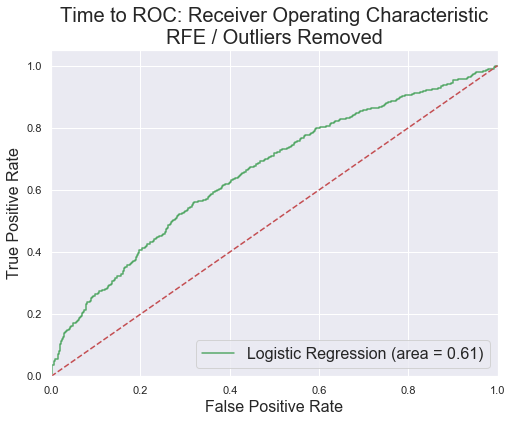

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t2, y_p_t2)
fpr, tpr, thresholds = roc_curve(y_t2, log_model2.predict_proba(X_t2)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nRFE / Outliers Removed',fontsize=20)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# What if we eliminated NO outliers...

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df.copy()
df1.drop(['url','timedelta'],axis=1,inplace=True)
ser, bins = pd.qcut(df1["shares"], 2, retbins=True, labels=['poor','good'])
df1['share_cat'] = pd.cut(df1["shares"], bins=bins, labels=[0,1], include_lowest=True)
df1.head()

In [ ]:
df1.drop(['shares'],axis=1,inplace=True)

In [ ]:
df1['shares'].describe()

In [ ]:
X_tr3a, X_t3a, y_tr3a, y_t3a = train_test_split(df1.drop('share_cat',axis=1), df1['share_cat'], test_size=0.20, 
                                                    random_state=0)

In [ ]:
log_model3 = LogisticRegression(solver='liblinear')
rfe3 = RFE(log_model3,n_features_to_select=8)
rfe3.fit(X_tr3a,y_tr3a)
print(rfe3.ranking_)
print(rfe3.support_)

In [ ]:
cols = X_tr3a.columns[rfe3.support_]
X_tr3, X_t3, y_tr3, y_t3 = train_test_split(df1[cols], df1['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

In [ ]:
log_model3.fit(X_tr3,y_tr3)

In [ ]:
y_p_tr3= log_model3.predict(X_tr3)
y_p_t3= log_model3.predict(X_t3)

acc_score_tr3 = accuracy_score(y_tr3, y_p_tr3)
acc_score_t3 = accuracy_score(y_t3, y_p_t3)

print("Acc Score on traning set: {}".format(acc_score_tr3))
print("Acc Score on testing set: {}".format(acc_score_t3)) 
print("")

bacc_score_tr3 = balanced_accuracy_score(y_tr3, y_p_tr3)
bacc_score_t3 = balanced_accuracy_score(y_t3, y_p_t3)

print("Balanced Acc Score on traning set: {}".format(bacc_score_tr3))
print("Balanced Acc Score on testing set: {}".format(bacc_score_t3)) 
print("")

precision_tr3 = precision_score(y_tr3, y_p_tr3)
precision_t3 = precision_score(y_t3, y_p_t3)

print("Precision Score on training set: {}".format(precision_tr3))
print("Precision Score on testing set: {}".format(precision_t3)) 
print("")

recall_tr3 = recall_score(y_tr3, y_p_tr3)
recall_t3 = recall_score(y_t3, y_p_t3)

print("Recall Score on training set: {}".format(recall_tr3))
print("Recall Score on testing set: {}".format(recall_t3)) 
print("")

f1_score_tr = f1_score(y_tr3, y_p_tr3)
f1_score_t = f1_score(y_t3, y_p_t3)
               
print("F1 Score on training set: {}".format(f1_score_tr))
print("F1 Score on testing set: {}".format(f1_score_t)) 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_t3, y_p_t3))

In [ ]:
confusion_matrix(y_t3, y_p_t3)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_t3, y_p_t3)
fpr, tpr, thresholds = roc_curve(y_t3, log_model3.predict_proba(X_t3)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='m' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_tr3,y_tr3)

In [ ]:
y_p_t_RF = ks_rf.predict(X_t3)
confusion_matrix(y_t3,y_p_t_RF)

In [ ]:
y_pred_proba_RF = ks_rf.predict_proba(X_t3)[:,1]

logit_roc_auc = roc_auc_score(y_t3, y_p_t_RF)

fpr, tpr, thresholds = roc_curve(y_t3, y_pred_proba_RF)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Not Removed\nRandom Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()


## Random Forest with Outliers Removed

In [ ]:
df2 = df.copy()

columns_out = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords',
              'kw_min_min', 'kw_max_min',"kw_avg_min", "kw_min_max", "kw_max_max","kw_avg_max", "kw_min_avg",
               "kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
               "self_reference_avg_sharess"]

for n in columns_out:
    print(n)
    
    q = iqr_fun(n,df2)
    df2 = df2[(df2[n]<=q[1]) & (df2[n]>=q[0])  ]

In [ ]:
sMaxQ

In [ ]:
df2 = df2[df2.shares<=sMaxQ+1000]
df2.reset_index(drop=True, inplace=True)
df2.drop(['url','timedelta'],axis=1,inplace=True)


ser, bins = pd.qcut(df2["shares"], 2, retbins=True, labels=['poor','good'])
df2['share_cat'] = pd.cut(df2["shares"], bins=bins, labels=[0,1], include_lowest=True)
df2.head()

In [ ]:
df2.drop(['shares'],axis=1,inplace=True)

In [ ]:
X_tr4a, X_t4a, y_tr4a,y_t4a = train_test_split(df2.drop('share_cat',axis=1), df2['share_cat'], test_size=0.2)

In [ ]:
log_model4 = LogisticRegression(solver='liblinear')

rfe4 = RFE(log_model4,n_features_to_select=8)
rfe4.fit(X_tr4a,y_tr4a)
print(rfe4.ranking_)
print(rfe4.support_)

In [ ]:
cols = X_tr4a.columns[rfe4.support_]
X_tr4, X_t4, y_tr4, y_t4 = train_test_split(df2[cols], df2['share_cat'], test_size=0.20, 
                                                    random_state=0)


cols

In [ ]:


ks_rf4 = RandomForestClassifier().fit(X_tr4,y_tr4)

In [ ]:
y_p_t_RF4 = ks_rf4.predict(X_t4)
confusion_matrix(y_t4,y_p_t_RF4)

In [ ]:
y_pred_proba_RF4 = ks_rf4.predict_proba(X_t4)[:,1]

logit_roc_auc = roc_auc_score(y_t4, y_p_t_RF4)

fpr, tpr, thresholds = roc_curve(y_t4, y_pred_proba_RF4)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='c' ,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Time to ROC: Receiver Operating Characteristic\nOutliers Removed - Random Forest',fontsize=24)
plt.legend(loc="lower right",fontsize=16)
plt.savefig('Log_ROC')
plt.show()

# Support Vector Machines

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(gamma='auto')
clf.fit(X_tr1, y_tr1)

In [ ]:
clf.score(X_t1, y_t1)